<a href="https://colab.research.google.com/github/jayy1809/Ahmedabad-house-renting/blob/main/housing2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('ahmedabad-gandhinagar-housing.csv')

In [3]:
print(df.shape)

(3918, 15)


In [4]:
df.head()

,property_price,property_bhk,property_sqft,property_city,property_locality,property_developer,is_furnished,num_of_lifts,num_of_carparkings,property_project,num_of_baths,num_of_balconies,bechelors_or_family,floornumber,totalfloor
0,27000.0,3.0,2211,Ahmedabad,Sarkhej Gandhinagar Highway,Godrej Properties,Semi-Furnished,2.0,NaN,Pinecrest Godrej Garden City,3.0,NaN,Family,5.0,22.0
1,180000.0,4.0,5400,Ahmedabad,Shilaj,NaN,Furnished,NaN,3.0,NaN,4.0,1.0,Family,NaN,NaN
2,32000.0,3.0,2013,Ahmedabad,Sardar Patel Ring Road,Goyal & Co and HN Safal,Semi-Furnished,3.0,NaN,Orchid Legacy,3.0,1.0,Bachelors/Family,5.0,16.0
3,120000.0,4.0,3500,Ahmedabad,Satellite,Iris Build Cone,Furnished,2.0,NaN,Iris Exotica,4.0,1.0,Family,8.0,14.0
4,35000.0,3.0,1472,Ahmedabad,Shela,GSG Abode LLP,Furnished,2.0,NaN,Orchid Sky,3.0,1.0,Family,9.0,12.0


In [5]:
df = df.rename(columns={'bechelors_or_family': 'bachelors_or_family'})

In [6]:
df['property_sqft'] = df['property_sqft'].str.replace(',', '').astype(float)

In [7]:
df['property_locality'] = df['property_locality'].str.split(',').str[-1].str.strip()

In [8]:
df.isnull().sum()

property_price            3
property_bhk             14
property_sqft           189
property_city             0
property_locality       209
property_developer     2083
is_furnished             24
num_of_lifts           2473
num_of_carparkings     2929
property_project       1561
num_of_baths            308
num_of_balconies       2125
bachelors_or_family       0
floornumber             471
totalfloor              425
dtype: int64

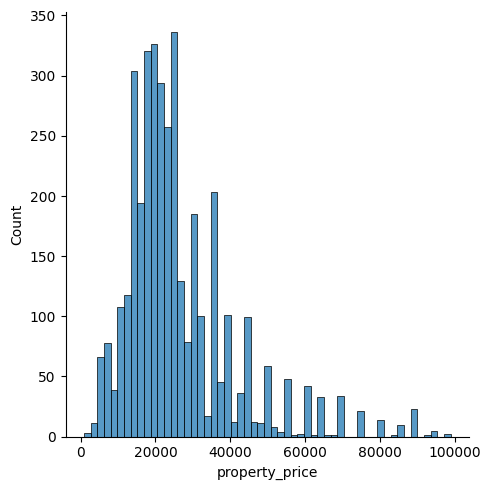

In [9]:
sns.displot(df.property_price[df.property_price < 100000],kde=False)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3918 entries, 0 to 3917
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_price       3915 non-null   float64
 1   property_bhk         3904 non-null   float64
 2   property_sqft        3729 non-null   float64
 3   property_city        3918 non-null   object 
 4   property_locality    3709 non-null   object 
 5   property_developer   1835 non-null   object 
 6   is_furnished         3894 non-null   object 
 7   num_of_lifts         1445 non-null   float64
 8   num_of_carparkings   989 non-null    float64
 9   property_project     2357 non-null   object 
 10  num_of_baths         3610 non-null   float64
 11  num_of_balconies     1793 non-null   float64
 12  bachelors_or_family  3918 non-null   object 
 13  floornumber          3447 non-null   float64
 14  totalfloor           3493 non-null   float64
dtypes: float64(9), object(6)
memory usage:

In [13]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, 100*(np.round(df[feature].isnull().mean(), 4)),  ' % missing values')


property_price 0.08  % missing values
property_bhk 0.36  % missing values
property_sqft 4.82  % missing values
property_locality 5.33  % missing values
property_developer 53.16  % missing values
is_furnished 0.61  % missing values
num_of_lifts 63.12  % missing values
num_of_carparkings 74.76  % missing values
property_project 39.839999999999996  % missing values
num_of_baths 7.86  % missing values
num_of_balconies 54.24  % missing values
floornumber 12.02  % missing values
totalfloor 10.85  % missing values


there are a lot of missing values and some column even shooting above 50% so we need to now look for the relationship between this independent features and our target variable


In [15]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
for col in string_columns:
 df[col] = df[col].str.lower().str.replace(' ', '_')

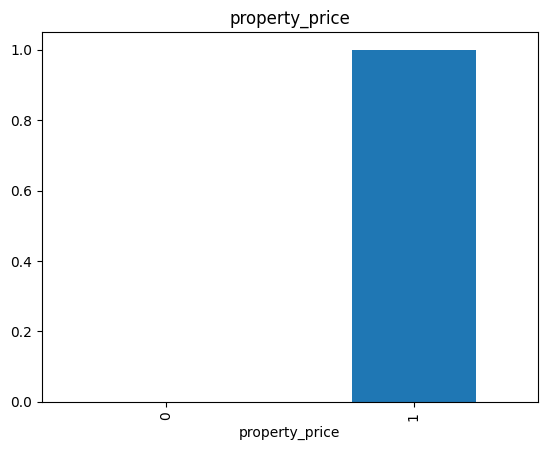

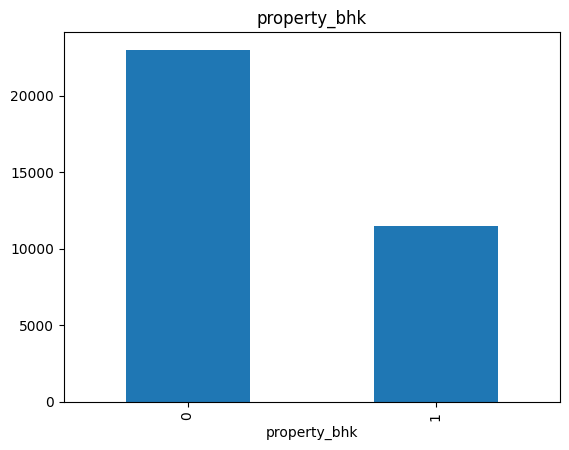

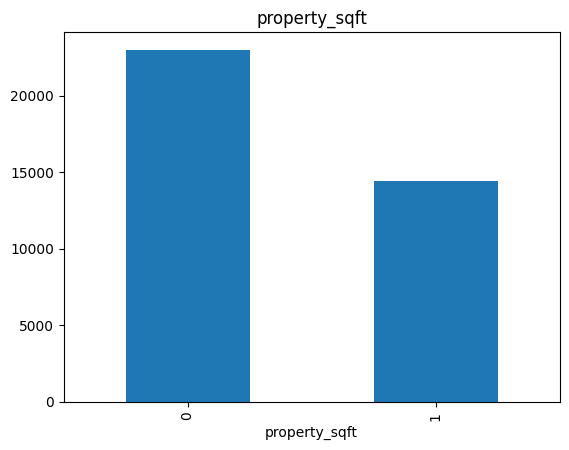

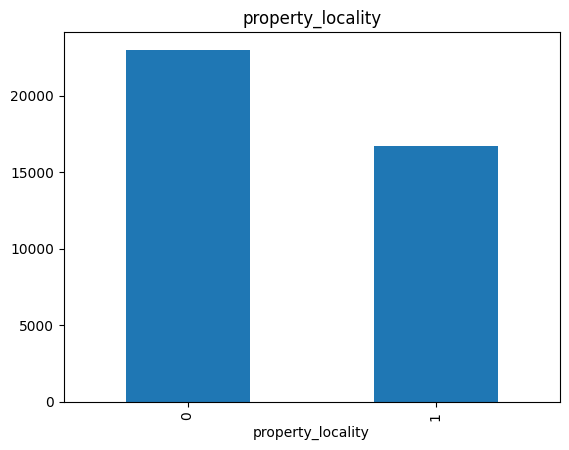

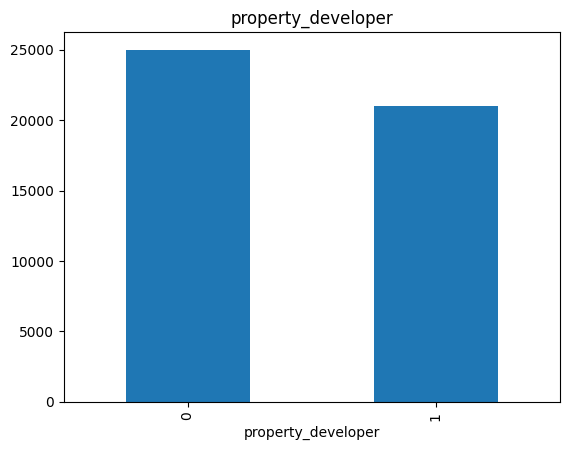

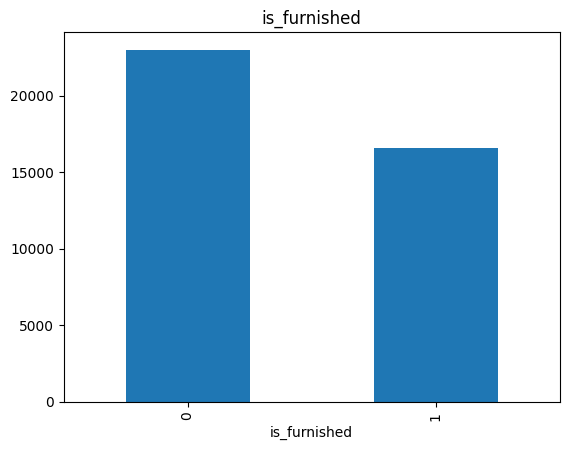

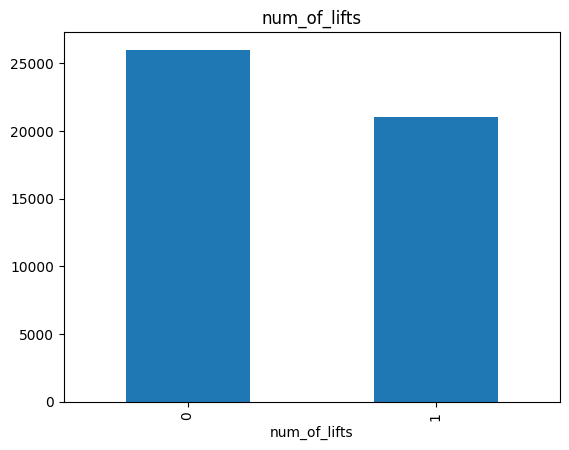

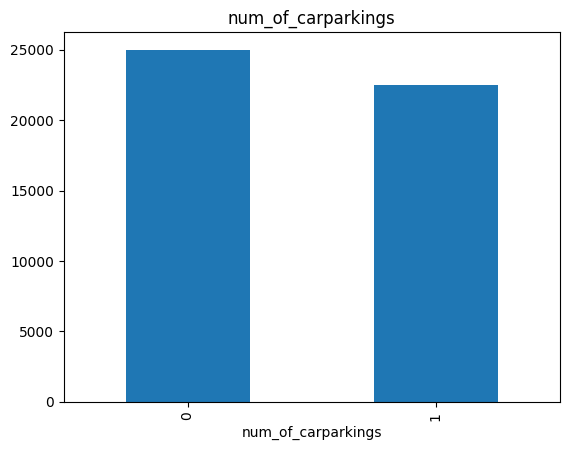

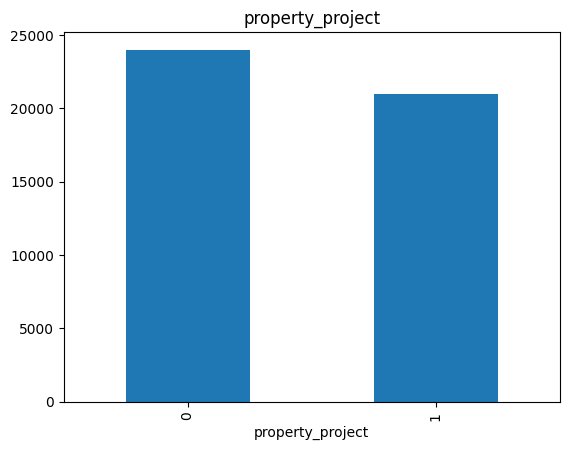

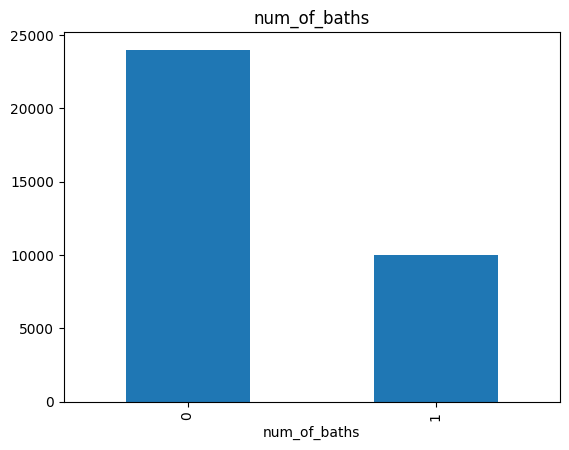

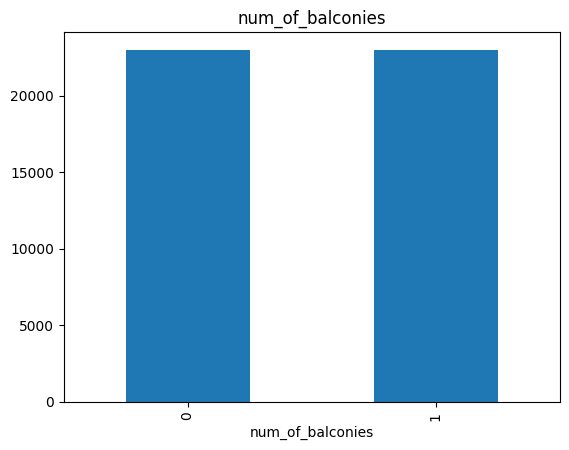

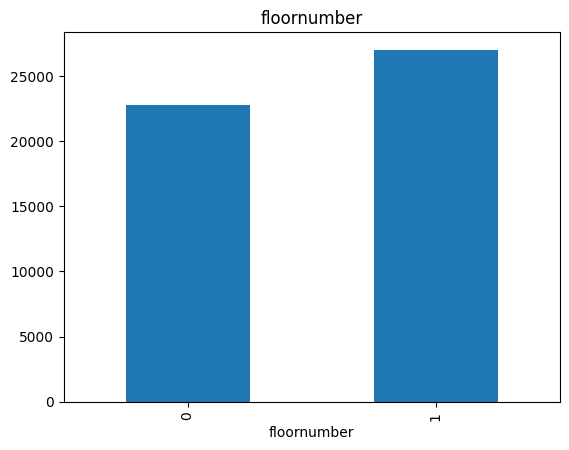

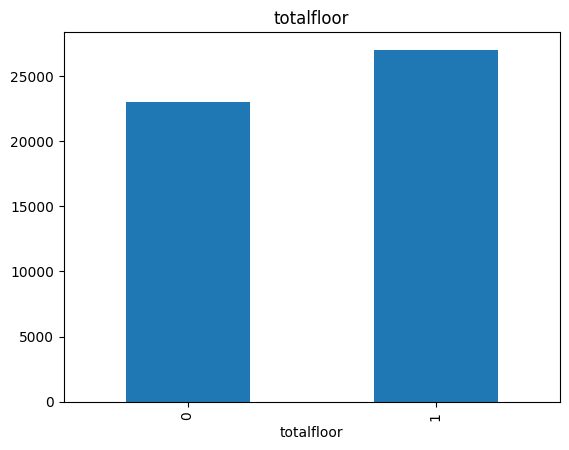

In [16]:
for feature in features_with_na:
  data = df.copy()

  # let's make a variable that indicates 1 if the observation was missing or zero otherwise
  data[feature] = np.where(data[feature].isnull(), 1, 0)

  # let's calculate the mean property_price where the information is missing or present
  data.groupby(feature)['property_price'].median().plot.bar()
  plt.title(feature)
  plt.show()

In [18]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
# above line captures all the numerical features d.types != 'O' means that datatype is not an object

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  9


,property_price,property_bhk,property_sqft,num_of_lifts,num_of_carparkings,num_of_baths,num_of_balconies,floornumber,totalfloor
0,27000.0,3.0,2211.0,2.0,NaN,3.0,NaN,5.0,22.0
1,180000.0,4.0,5400.0,NaN,3.0,4.0,1.0,NaN,NaN
2,32000.0,3.0,2013.0,3.0,NaN,3.0,1.0,5.0,16.0
3,120000.0,4.0,3500.0,2.0,NaN,4.0,1.0,8.0,14.0
4,35000.0,3.0,1472.0,2.0,NaN,3.0,1.0,9.0,12.0


Text(0.5, 1.0, 'House Price vs bhk')

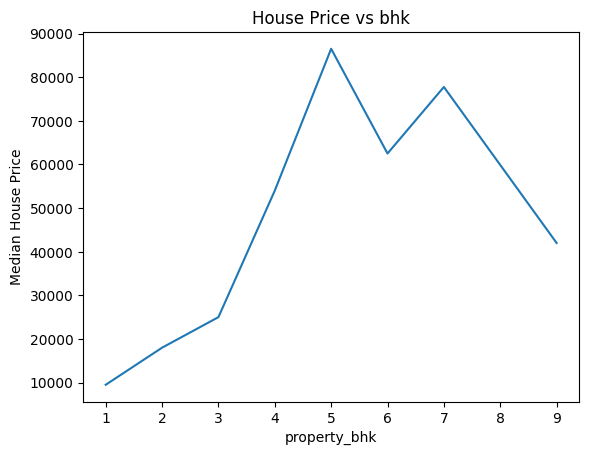

In [19]:
df.groupby('property_bhk')['property_price'].median().plot()
plt.xlabel('property_bhk')
plt.ylabel('Median House Price')
plt.title("House Price vs bhk")

here we see an increase in trend as the bhk increase our price is also increasing upto 5 bhk but after that it is decreasing , as because we might have no values or many values with 6bhk and 9 bhk hence they are soo low


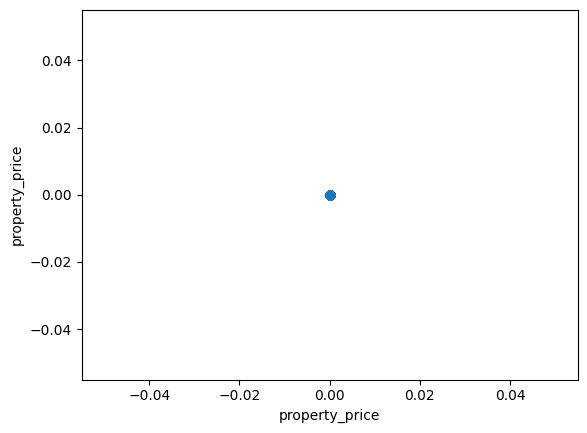

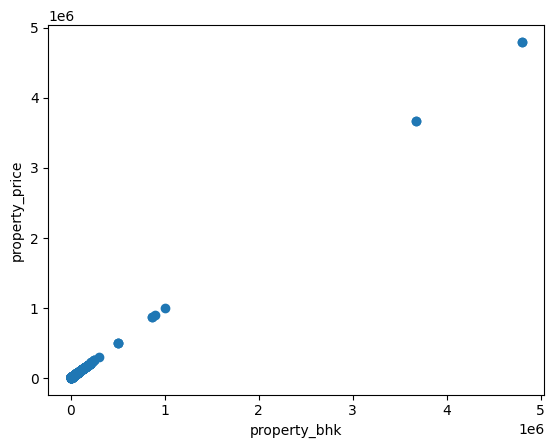

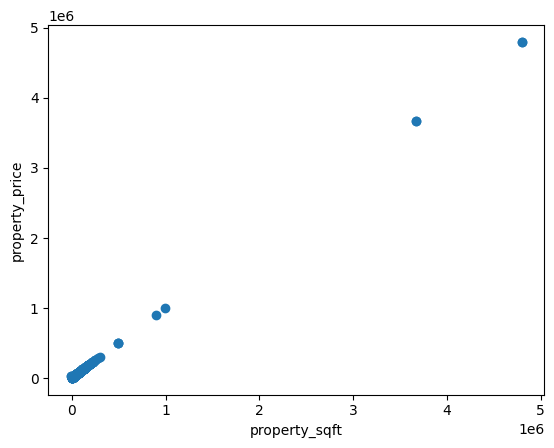

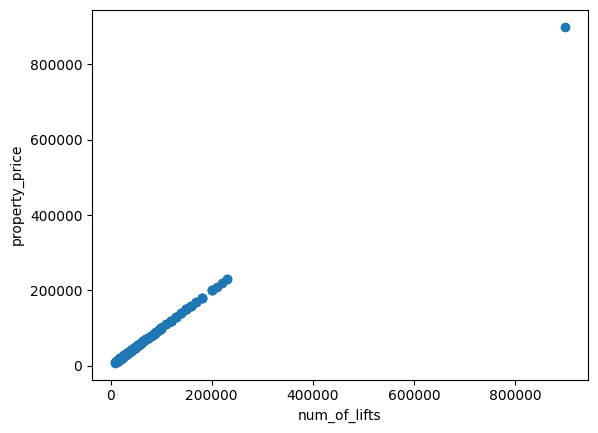

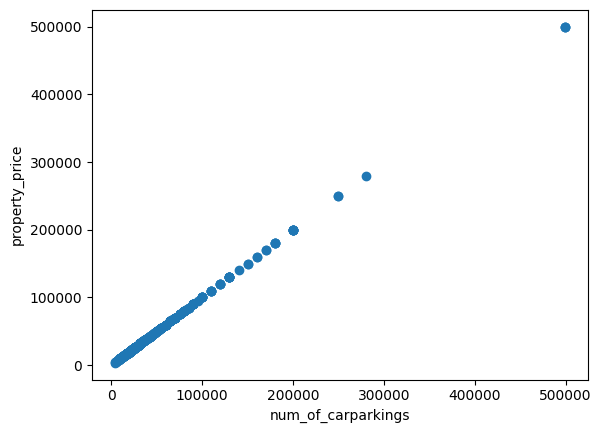

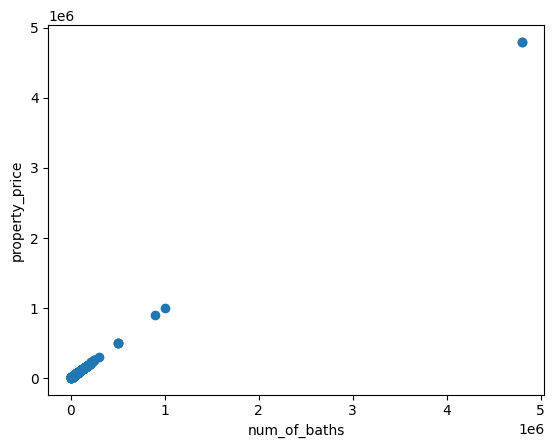

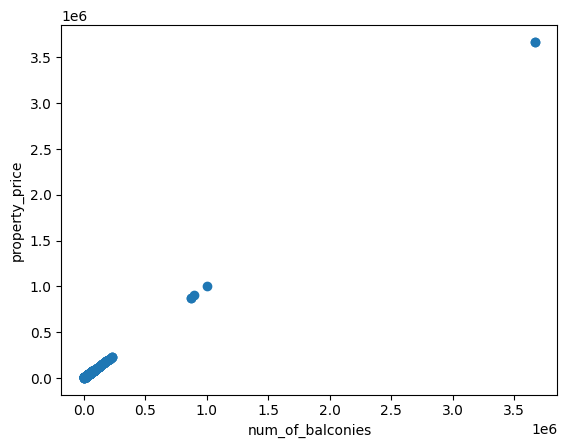

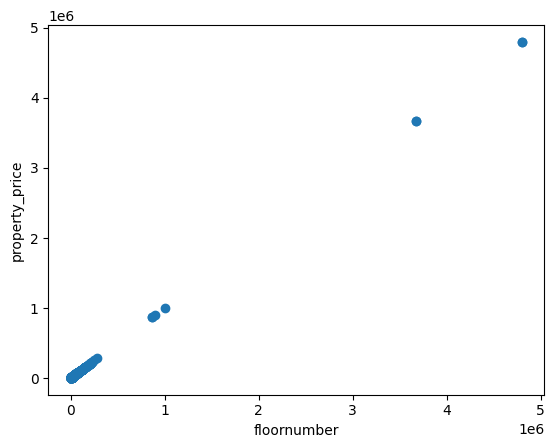

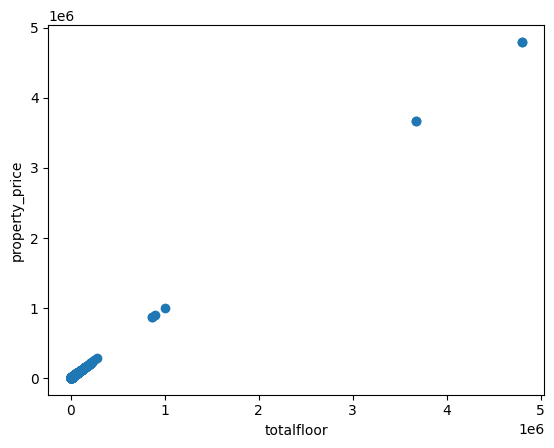

In [22]:
for feature in numerical_features:
    # if feature!='':
    data=df.copy()

    data[feature]=data['property_price']-data[feature]

    plt.scatter(data[feature],data['property_price'])
    plt.xlabel(feature)
    plt.ylabel('property_price')
    plt.show()

In [24]:
df[numerical_features].nunique()

property_price        251
property_bhk            8
property_sqft         718
num_of_lifts            7
num_of_carparkings      7
num_of_baths            6
num_of_balconies        1
floornumber            19
totalfloor             27
dtype: int64

In [25]:
df.nunique()

property_price         251
property_bhk             8
property_sqft          718
property_city            2
property_locality      196
property_developer     308
is_furnished             3
num_of_lifts             7
num_of_carparkings       7
property_project       802
num_of_baths             6
num_of_balconies         1
bachelors_or_family      3
floornumber             19
totalfloor              27
dtype: int64

In [23]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25 ]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 6


In [26]:
discrete_feature

['property_bhk',
 'num_of_lifts',
 'num_of_carparkings',
 'num_of_baths',
 'num_of_balconies',
 'floornumber']

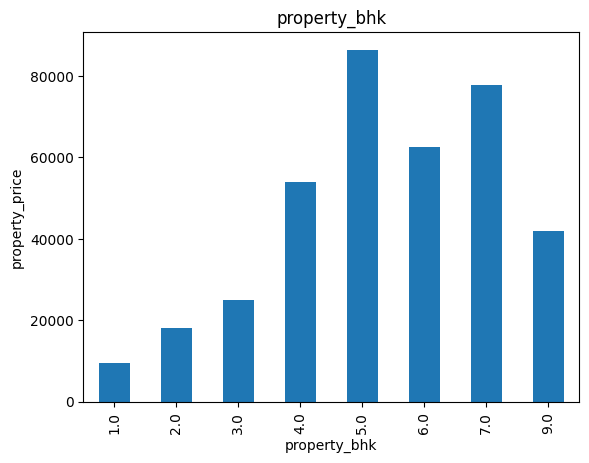

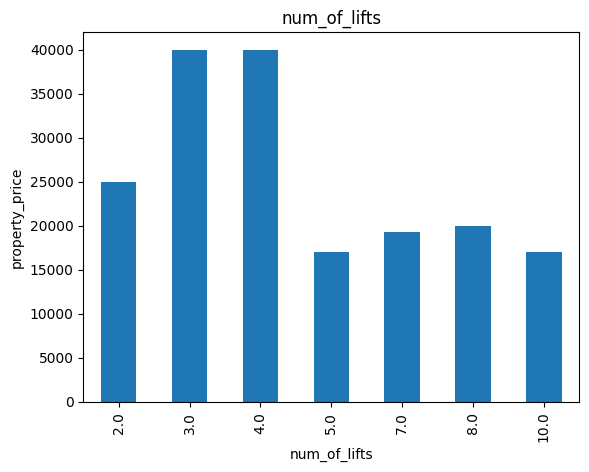

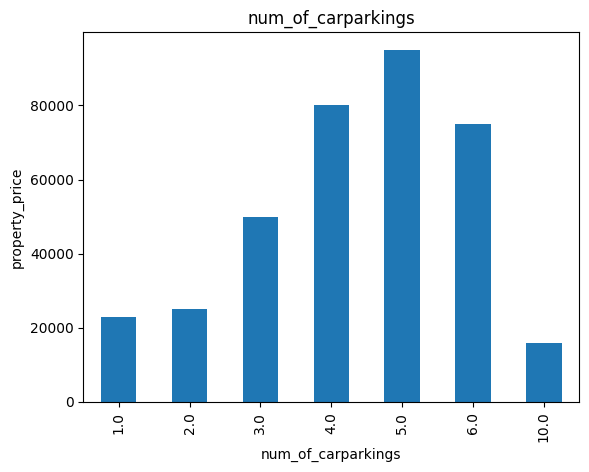

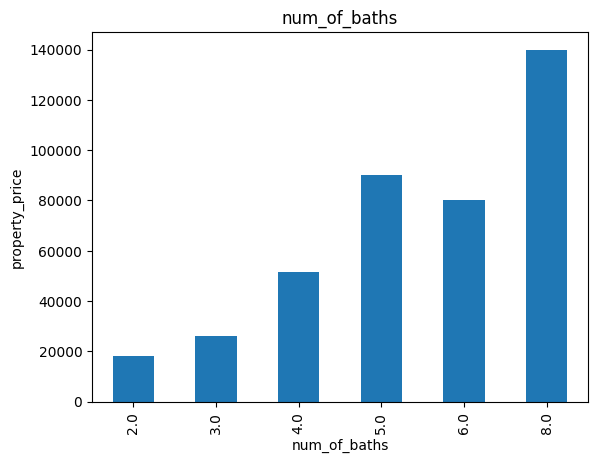

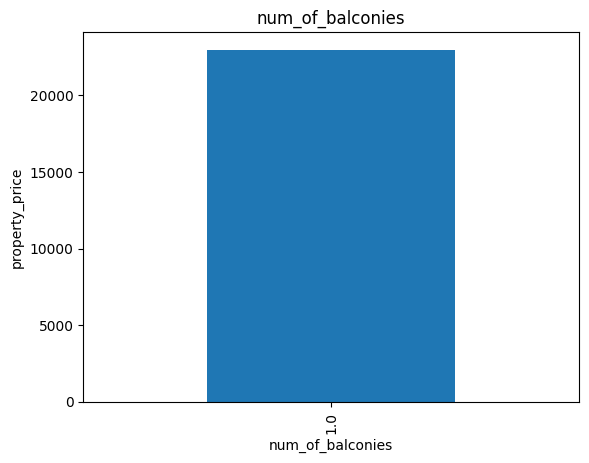

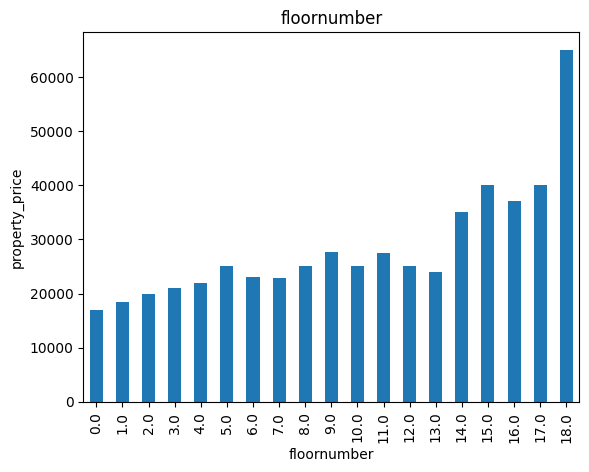

In [30]:
## Lets Find the realtionship between them and price

for feature in discrete_feature:
    data=df.copy()
    data.groupby(feature)['property_price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('property_price')
    plt.title(feature)
    plt.show()

In [31]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 3


In [32]:
continuous_feature

['property_price', 'property_sqft', 'totalfloor']

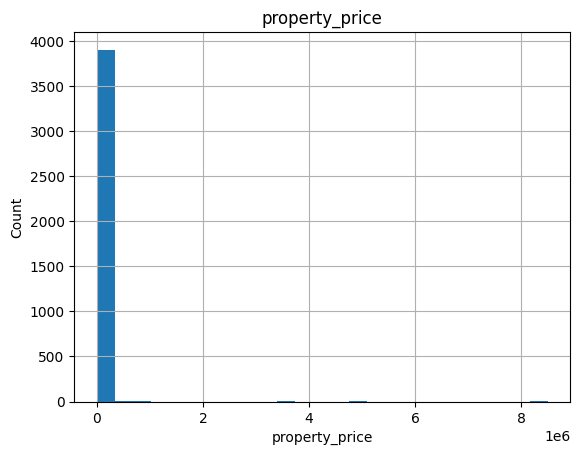

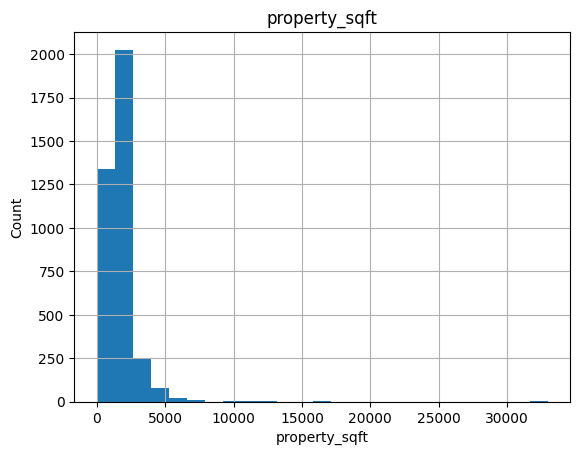

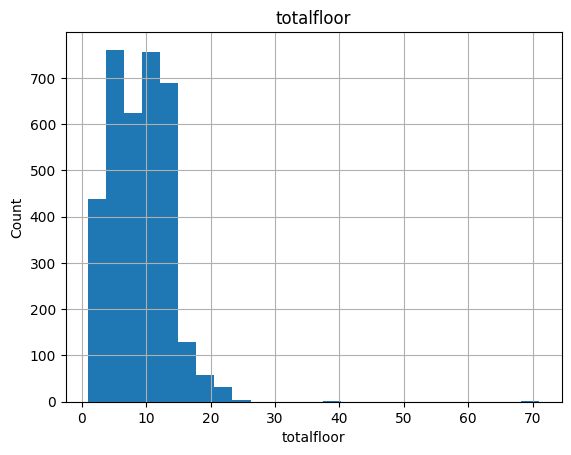

In [33]:
for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

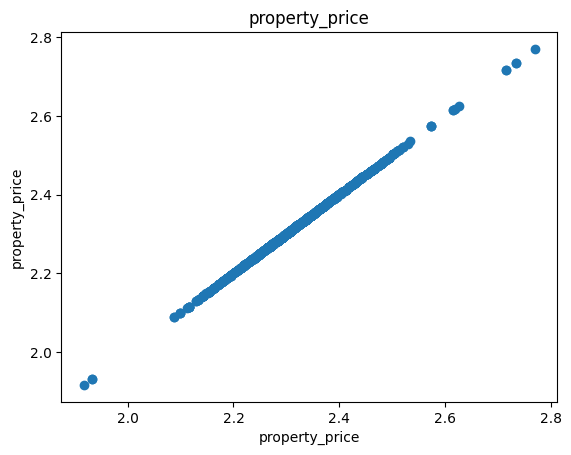

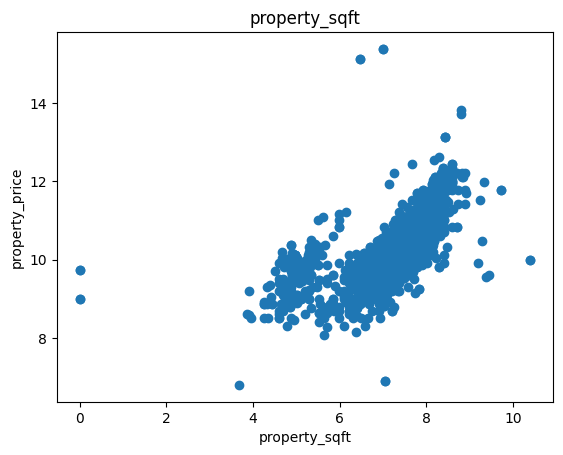

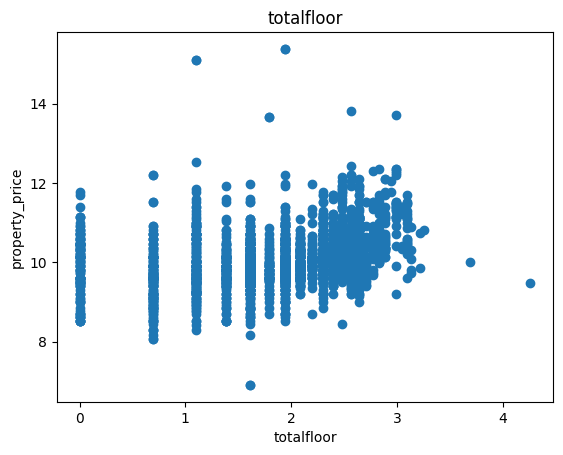

In [34]:
# with logrithmic transformation

for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['property_price']=np.log(data['property_price'])
        plt.scatter(data[feature],data['property_price'])
        plt.xlabel(feature)
        plt.ylabel('property_price')
        plt.title(feature)
        plt.show()

lets look for outliers


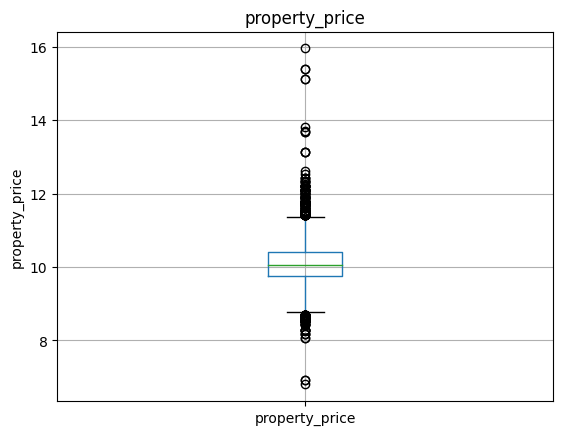

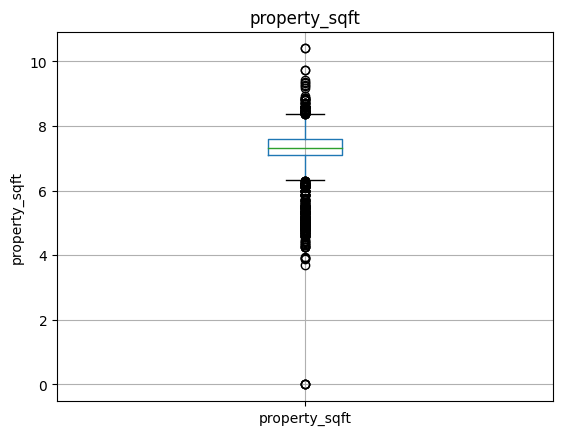

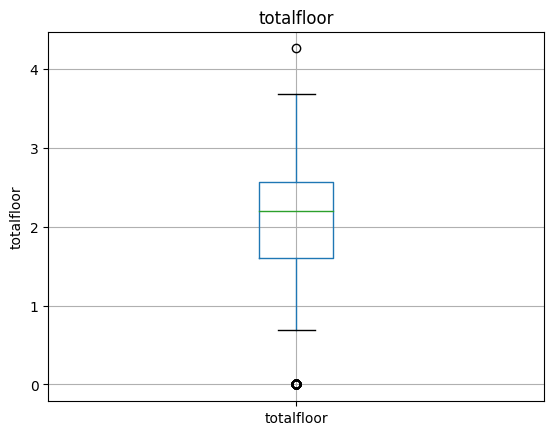

In [35]:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

HERE there are lot of outliers need to do something then


In [36]:
categorical_features=[feature for feature in df.columns if data[feature].dtypes=='O']
categorical_features

['property_city',
 'property_locality',
 'property_developer',
 'is_furnished',
 'property_project',
 'bachelors_or_family']

In [38]:
df[categorical_features].head()

,property_city,property_locality,property_developer,is_furnished,property_project,bachelors_or_family
0,ahmedabad,sarkhej_gandhinagar_highway,godrej_properties,semi-furnished,pinecrest_godrej_garden_city,family
1,ahmedabad,shilaj,NaN,furnished,NaN,family
2,ahmedabad,sardar_patel_ring_road,goyal_&_co_and_hn_safal,semi-furnished,orchid_legacy,bachelors/family
3,ahmedabad,satellite,iris_build_cone,furnished,iris_exotica,family
4,ahmedabad,shela,gsg_abode_llp,furnished,orchid_sky,family


In [39]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is property_city and number of categories are 2
The feature is property_locality and number of categories are 197
The feature is property_developer and number of categories are 309
The feature is is_furnished and number of categories are 4
The feature is property_project and number of categories are 803
The feature is bachelors_or_family and number of categories are 3


Find out the relationship between categorical variable and dependent feature price


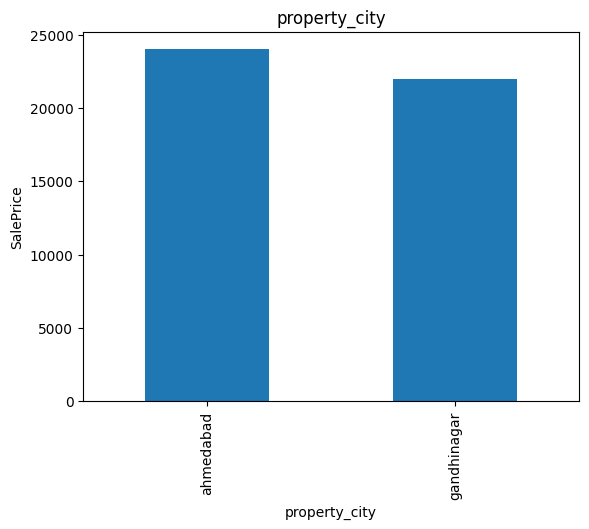

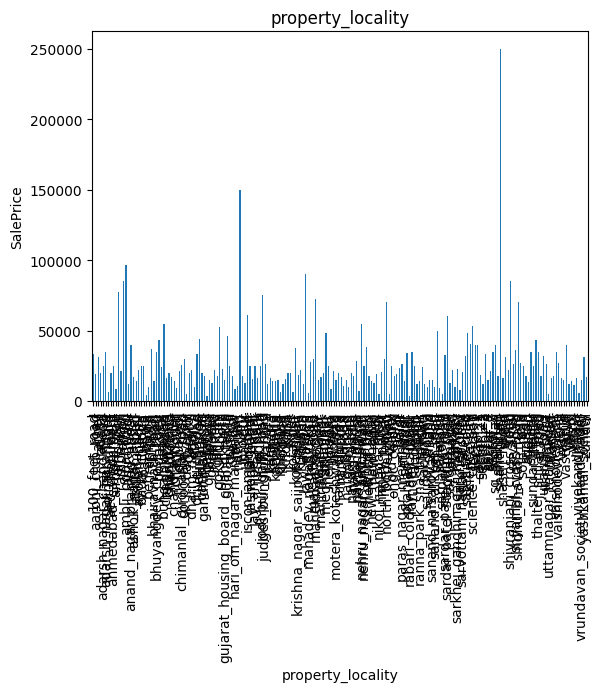

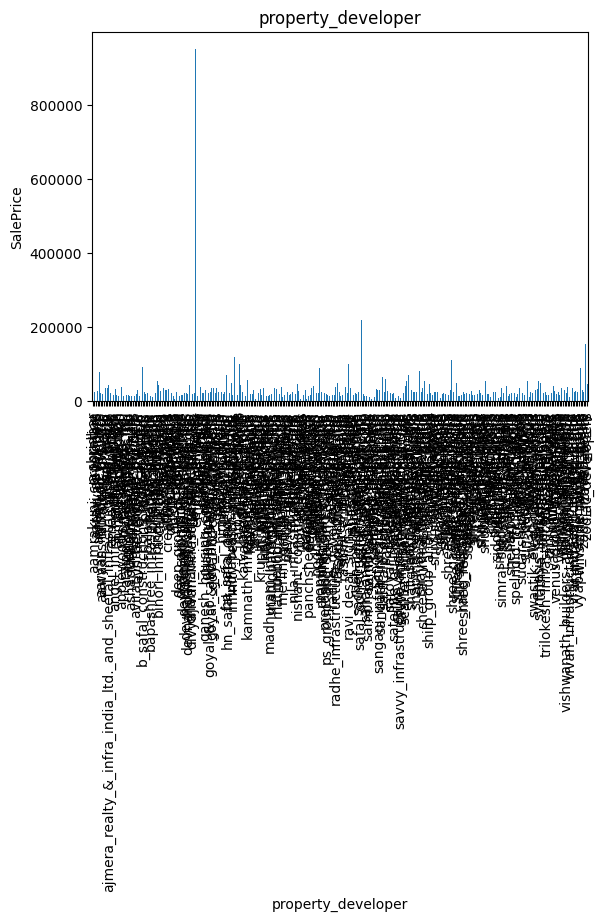

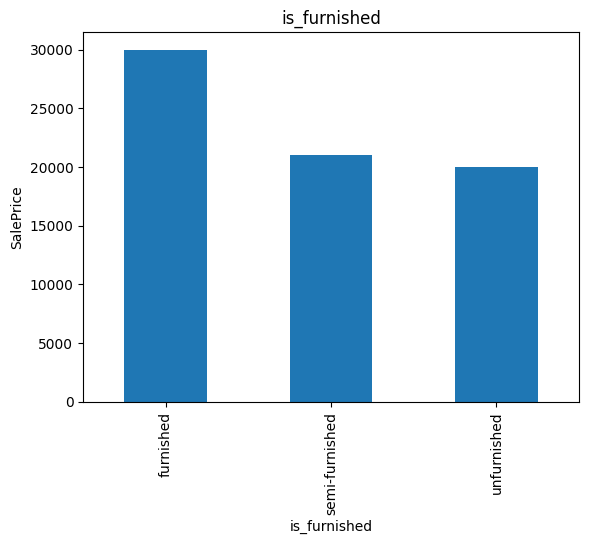

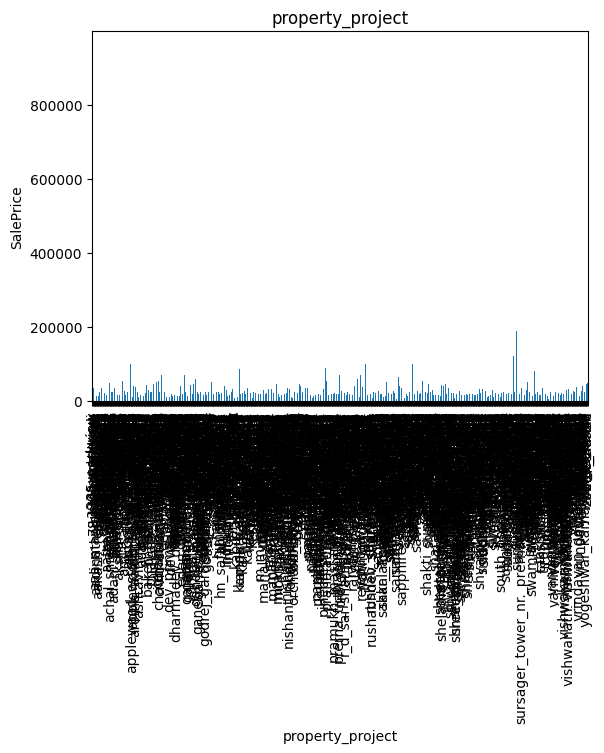

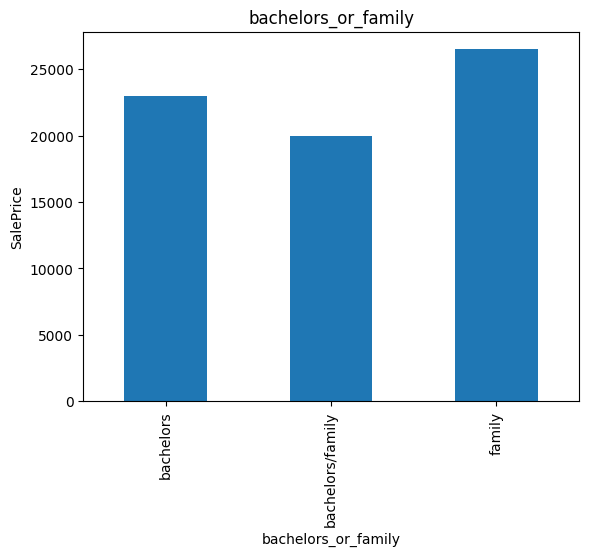

In [44]:
for feature in categorical_features:
    data=df.copy()
    data.groupby(feature)['property_price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [48]:
# del df['num_of_lifts']
del df['num_of_carparkings']

In [49]:
del df['num_of_balconies']

In [50]:
del df['property_developer']

In [51]:
df.columns

Index(['property_price', 'property_bhk', 'property_sqft', 'property_city',
       'property_locality', 'is_furnished', 'property_project', 'num_of_baths',
       'bachelors_or_family', 'floornumber', 'totalfloor'],
      dtype='object')

In [52]:
## Replace missing value with a new label
# here we are replacing null values with missing in categorical variables

features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='O']

def replace_cat_feature(dataset,features_nan):
    data=dataset.copy()
    data[features_nan]=data[features_nan].fillna('missing')
    return data

df=replace_cat_feature(df,features_nan)

df[features_nan].isnull().sum()

property_locality    0
is_furnished         0
property_project     0
dtype: int64

In [53]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(df[feature].isnull().mean(),4)))

property_price: 0.0008% missing value
property_bhk: 0.0036% missing value
property_sqft: 0.0482% missing value
num_of_baths: 0.0786% missing value
floornumber: 0.1202% missing value
totalfloor: 0.1085% missing value


In [54]:
for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=df[feature].median()

    ## create a new feature to capture nan values
    # here if it has null values replace it with 1 in new column else 0 so we can see which values we added which were null before
    df[feature+'nan']=np.where(df[feature].isnull(),1,0)
    df[feature].fillna(median_value,inplace=True)

df[numerical_with_nan].isnull().sum()

property_price    0
property_bhk      0
property_sqft     0
num_of_baths      0
floornumber       0
totalfloor        0
dtype: int64

In [55]:
df.head()

,property_price,property_bhk,property_sqft,property_city,property_locality,is_furnished,property_project,num_of_baths,bachelors_or_family,floornumber,totalfloor,property_pricenan,property_bhknan,property_sqftnan,num_of_bathsnan,floornumbernan,totalfloornan
0,27000.0,3.0,2211.0,ahmedabad,sarkhej_gandhinagar_highway,semi-furnished,pinecrest_godrej_garden_city,3.0,family,5.0,22.0,0,0,0,0,0,0
1,180000.0,4.0,5400.0,ahmedabad,shilaj,furnished,missing,4.0,family,4.0,9.0,0,0,0,0,1,1
2,32000.0,3.0,2013.0,ahmedabad,sardar_patel_ring_road,semi-furnished,orchid_legacy,3.0,bachelors/family,5.0,16.0,0,0,0,0,0,0
3,120000.0,4.0,3500.0,ahmedabad,satellite,furnished,iris_exotica,4.0,family,8.0,14.0,0,0,0,0,0,0
4,35000.0,3.0,1472.0,ahmedabad,shela,furnished,orchid_sky,3.0,family,9.0,12.0,0,0,0,0,0,0


In [56]:
df['price/sqft'] = df['property_price'] / df['property_sqft']

In [57]:
df.columns

Index(['property_price', 'property_bhk', 'property_sqft', 'property_city',
       'property_locality', 'is_furnished', 'property_project', 'num_of_baths',
       'bachelors_or_family', 'floornumber', 'totalfloor', 'property_pricenan',
       'property_bhknan', 'property_sqftnan', 'num_of_bathsnan',
       'floornumbernan', 'totalfloornan', 'price/sqft'],
      dtype='object')

In [61]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes!='O']

correlation_matrix  = df[numerical_features].corr()
correlation_with_target = correlation_matrix['property_price']
print(correlation_with_target)

property_price       1.000000
property_bhk         0.056249
property_sqft        0.068432
num_of_baths         0.079953
floornumber         -0.010334
totalfloor           0.014064
property_pricenan   -0.002041
property_bhknan      0.187322
property_sqftnan     0.041625
num_of_bathsnan      0.048003
floornumbernan       0.043463
totalfloornan        0.045969
price/sqft           0.369002
Name: property_price, dtype: float64


In [64]:
from sklearn.metrics import mutual_info_score

def calculate_mi(series):
  return mutual_info_score(series, df.property_price)


categorical_features = [feature for feature in df.columns if df[feature].dtypes=='O']

df_mi = df[categorical_features].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending = False).to_frame(name = 'MI')
df_mi


,MI
property_project,1.821143
property_locality,1.184251
is_furnished,0.164070
bachelors_or_family,0.151861
property_city,0.093605


In [65]:
from sklearn.model_selection import train_test_split



In [66]:
from sklearn import random
df_train_full , df_test = train_test_split(df, test_size=0.2, random_state=42)

In [67]:
df_train , df_val = train_test_split(df_train_full, test_size = 0.25, random_state = 42)

In [68]:
y_train = df_train.property_price.values
y_val = df_val.property_price.values

In [69]:
del df_train['property_price']
del df_val['property_price']

In [70]:
global_mean = df_train_full.property_price.mean()
print(global_mean)

36603.881620931716


In [71]:
numerical_summary_stats = df_train_full[numerical_features].describe()

print(numerical_summary_stats)

       property_price  property_bhk  property_sqft  num_of_baths  floornumber  \
count    3.134000e+03   3134.000000    3134.000000   3134.000000  3134.000000   
mean     3.660388e+04      2.711870    1718.009572      2.807594     4.665284   
std      1.571166e+05      0.840413    1306.500523      0.736833     3.140902   
min      9.000000e+02      1.000000       1.000000      2.000000     0.000000   
25%      1.700000e+04      2.000000    1213.250000      2.000000     2.000000   
50%      2.300000e+04      3.000000    1490.000000      3.000000     4.000000   
75%      3.400000e+04      3.000000    2009.250000      3.000000     6.000000   
max      4.800000e+06      9.000000   33000.000000      8.000000    18.000000   

        totalfloor  property_pricenan  property_bhknan  property_sqftnan  \
count  3134.000000        3134.000000      3134.000000       3134.000000   
mean      8.865986           0.000638         0.003191          0.047862   
std       4.470627           0.025258     

In [72]:
categorical_summary_stats = df_train_full[categorical_features].describe()
print(categorical_summary_stats)

       property_city property_locality    is_furnished property_project  \
count           3134              3134            3134             3134   
unique             2               183               4              715   
top        ahmedabad          sargasan  semi-furnished          missing   
freq            2192               344            1205             1248   

       bachelors_or_family  
count                 3134  
unique                   3  
top       bachelors/family  
freq                  1158  


In [73]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [76]:
numerical_features2 = [feature for feature in df_train.columns if df_train[feature].dtypes!='O']

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=42))
feature_sel_model.fit(df_train[numerical_features2], y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=42))

In [77]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [82]:

# HENCE ALL FEATURES ARE USEFUL

In [80]:
dict_train = df_train.to_dict(orient = 'records')
dict_val = df_val.to_dict(orient = 'records')

# dict_train = df_train[categorical + numerical2].to_dict(orient = 'records')



In [81]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse = False)

X_train = dv.fit_transform(dict_train)
X_val = dv.transform(dict_val)

In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf_model = RandomForestRegressor(
    n_estimators=100,  # Number of trees (you can adjust this)
    random_state=42    # Random seed for reproducibility
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_val)


rmse_rf = mean_squared_error(y_val, y_pred_rf, squared=False)
print(f"RandomForestRegressor RMSE: {rmse_rf}")

RandomForestRegressor RMSE: 58353.612853390994


In [85]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

xgb_model = XGBRegressor(
    n_estimators=100,  # Number of boosting rounds (you can adjust this)
    learning_rate=0.1,  # Learning rate (you can adjust this)
    max_depth=3,  # Maximum depth of trees (you can adjust this)
    random_state=42  # Random seed for reproducibility
)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_val)

rmse = mean_squared_error(y_val, y_pred, squared=False)
print(f"Root Mean Squared Error , XGB (RMSE): {rmse}")

Root Mean Squared Error , XGB (RMSE): 4060.373033782417


In [90]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

xgb_model2 = XGBRegressor(
    n_estimators=150,  # Number of boosting rounds (you can adjust this)
    learning_rate=1.0,  # Learning rate (you can adjust this)
    max_depth=10,  # Maximum depth of trees (you can adjust this)
    random_state=42  # Random seed for reproducibility
)

xgb_model2.fit(X_train, y_train)

y_pred2 = xgb_model2.predict(X_val)

rmse = mean_squared_error(y_val, y_pred, squared=False)
print(f"Root Mean Squared Error , XGB (RMSE): {rmse}")

Root Mean Squared Error , XGB (RMSE): 4060.373033782417


------------------------------------------------------------------------

HYPERPARAMETER TUNING , here i did hyper parameter tuning to even further decrease the root mean square error. we found the best parameters , also did cross fold for regularization , to prevent model from overfitting

------------------------------------------------------------------------

In [94]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}


grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_xgb = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred = best_xgb.predict(X_val)

# HERE WE HAVE DID GRIDSEARCH, to find the best parameters

In [96]:
print(best_params)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}


In [95]:
rmse = mean_squared_error(y_val, y_pred, squared=False)
print(f"Root Mean Squared Error , XGB (RMSE): {rmse}")

Root Mean Squared Error , XGB (RMSE): 2318.147559791237


In [97]:
from sklearn.model_selection import GridSearchCV

param_grid2 = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}


grid_search2 = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error')

grid_search2.fit(X_train, y_train)

best_xgb2 = grid_search2.best_estimator_
best_params2 = grid_search2.best_params_

y_pred2 = best_xgb2.predict(X_val)

# HERE WE HAVE DID GRIDSEARCH, to find the best parameters

In [99]:
rmse = mean_squared_error(y_val, y_pred2, squared=False)
print(f"Root Mean Squared Error , XGB (RMSE): {rmse}")

# here we even reduced it to 2252.2522 by increasing cross fold validation to 10, 10 fold cross validation

Root Mean Squared Error , XGB (RMSE): 2252.2522685528875


------------------------------------------------------------------------

  **USING OUR MODEL**

------------------------------------------------------------------------

In [100]:
ad={
    'property_sqft' : 1600,
    'property_bhk':3,
    'property_city':'ahmedabad',
    'property_locality':'bopal',
    'property_developers': 'civic_organizers',
    'is_furnished':'semi-furnished',
    'num_of_lifts' : 2,
    'num_of_carparkings':1,
    'property_project': 'civic_samanvay_residency',
    'num_of_baths' : 3,
    'num_of_balconies' : 1,
    'bachelors_or_family' : 'family',
    'floornumber' : 5,
    'totalfloor' : 10
}

# this house orignal price is 25000

In [101]:
df_test = pd.DataFrame([ad])


In [102]:
X_test = dv.transform(ad)

In [113]:
y_pred_test = best_xgb2.predict(X_test)
print(y_pred_test)


[5594.2065]
[inf]


<ipython-input-113-8af550b8d934>:4: RuntimeWarning: overflow encountered in exp
  y_pred_original_scale = np.exp(y_pred_test)


In [111]:
y_pred_test = rf_model.predict(X_test)
print(y_pred_test)

[6867.99]


In [104]:
ad2={
    'property_sqft' : 6975,
    'property_bhk':5,
    'property_city':'ahmedabad',
    'property_locality':'thaltej',
    'property_developers': '',
    'is_furnished':'furnished',
    'num_of_lifts' : 4,
    'num_of_carparkings':2,
    'property_project': '',
    'num_of_baths' : 5,
    'num_of_balconies' : 3,
    'bachelors_or_family' : 'family',
    'floornumber' : 0 ,
    'totalfloor' : 0
}

In [107]:
X_test2 = dv.transform(ad2)
y_pred_test2 = best_xgb2.predict(X_test2)
print(y_pred_test2)

[42898.45]


In [114]:
from sklearn.linear_model import Ridge

alpha = 1.0

ridge_model = Ridge(alpha = alpha)

ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_val)

rmse_ridge = mean_squared_error(y_val, y_pred_ridge, squared=False)
print(f"Ridge Regression RMSE: {rmse_ridge}")

Ridge Regression RMSE: 119733.24126304878


In [117]:
y_pred_test2 = ridge_model.predict(X_test)
print(y_pred_test2)


[21181.21550801]


<ipython-input-109-86fe8e120ae4>:1: RuntimeWarning: invalid value encountered in log1p
  y_pred_log = np.log1p(y_pred)


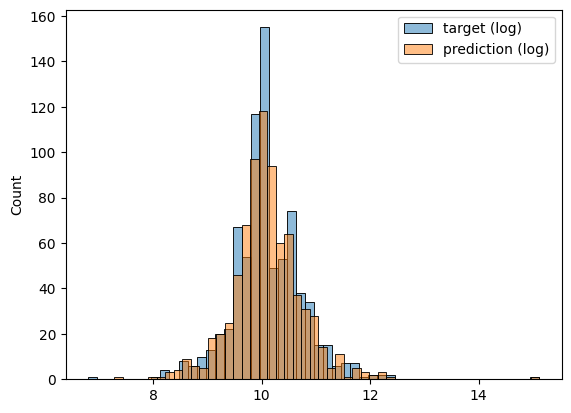

In [109]:

y_pred_log = np.log1p(y_pred)
y_val_log = np.log1p(y_val)


sns.histplot(y_val_log, label='target (log)', alpha=0.5, bins=50)
sns.histplot(y_pred_log, label='prediction (log)', alpha=0.5, bins=50)
plt.legend()

(0.0, 100000.0)

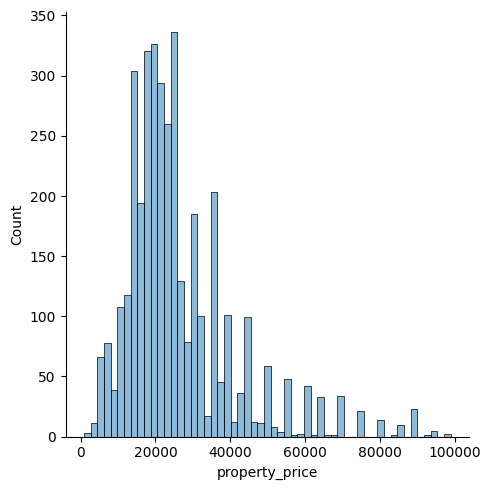

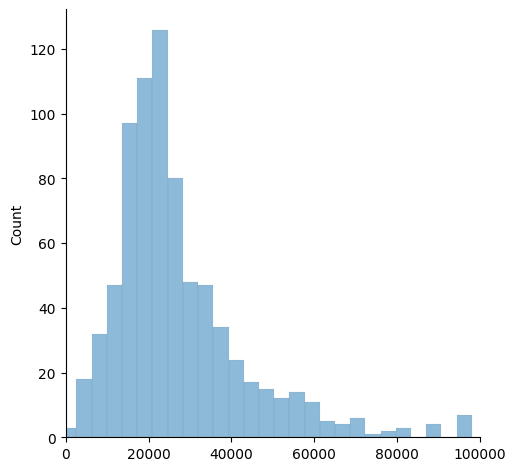

In [110]:
sns.displot(df.property_price[df.property_price < 100000],kde=False, alpha=0.5)
sns.displot(y_pred, kde=False,alpha=0.5)
plt.xlim(0, 100000)